# Seaborn on mpg data

## Data Introduction
The mpg dataset from Seaborn contains data about various car models and their fuel consumption in miles per gallon (mpg). This dataset originates from the 1970s and 1980s and is often used to analyze the performance and characteristics of cars, especially with regard to fuel efficiency.

## Data Description
The dataset contains the following columns:

- **mpg**: Miles per gallon, a measure of fuel efficiency.
- **cylinders**: Number of cylinders in the car’s engine.
- **displacement**: Engine displacement, in cubic inches.
- **horsepower**: Engine power, measured in horsepower.
- **weight**: Weight of the car, in pounds.
- **acceleration**: Time taken to accelerate from 0 to 60 mph (in seconds).
- **model year**: Year in which the car model was produced.
- **origin**: The region where the car was manufactured (1 = USA, 2 = Europe, 3 = Japan).
- **name**: The name of the car model.

## Data Cleansing

In [1]:
# Ignore warnings

import warnings

warnings.simplefilter(action = "ignore", category = FutureWarning)

In [2]:
# Import the dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Import seaborn

import seaborn as sns

In [16]:
mpg = sns.load_dataset("mpg")

In [17]:
print(mpg.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino  


### Heapmap
Create a heatmap to show missing values.

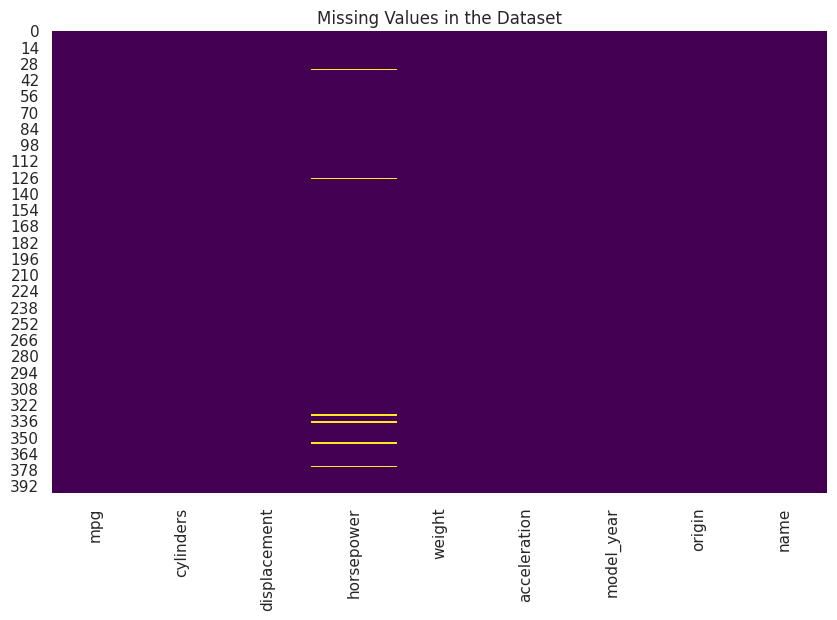

In [18]:
plt.figure(figsize=(10, 6))
sns.heatmap(mpg.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in the Dataset')
plt.show()

### Replace missing horsepower values with the column's mean

In [19]:
# Replace missing horsepower values with the column's mean
mpg['horsepower'].fillna(mpg['horsepower'].mean(), inplace=True)

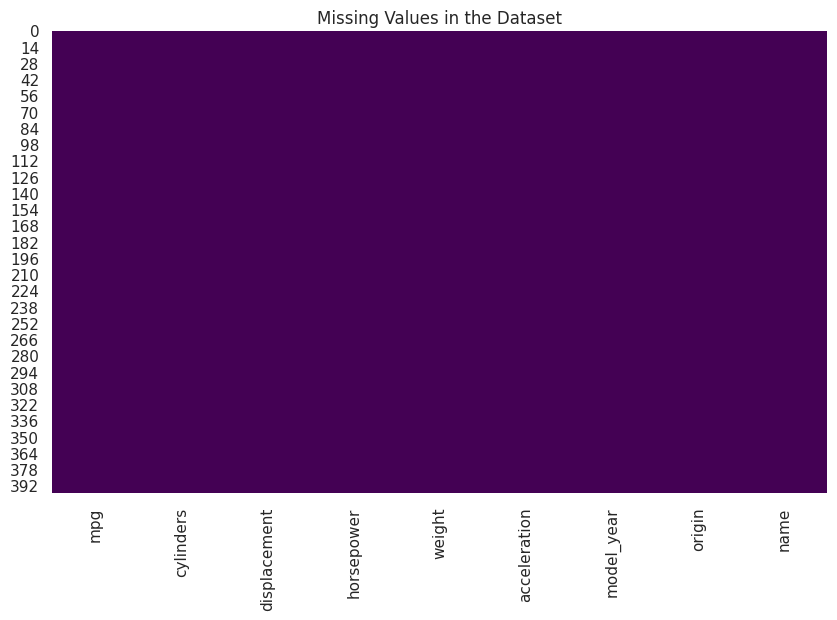

In [12]:
plt.figure(figsize=(10, 6))
sns.heatmap(mpg.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in the Dataset')
plt.show()

In [20]:
print(mpg['origin'].value_counts())

origin
usa       249
japan      79
europe     70
Name: count, dtype: int64


### Fixing data types
Ensure that `origin` is treated as a categorical variable and not a numerical one.

**Why?**
1. The `origin` column represents different car manufacturing regions (USA, Europe, Japan), not numeric values. If it's treated as a number, calculations like finding the mean, performing regression, or other mathematical operations wouldn't make sense. Converting it to a categorical type helps you avoid incorrect interpretations.
2. Seaborn and other plotting libraries handle categorical variables differently from numeric variables. By converting `origin` to a categorical type, Seaborn will automatically know to treat it as a grouping factor for plots like bar plots, box plots, or hue in scatter plots. This ensures that visualizations are generated correctly.
3. many many more

In [9]:
# Check the data type of 'origin' before conversion
print(mpg['origin'].dtype)

# Convert the 'origin' column to a categorical data type
mpg['origin'] = mpg['origin'].astype('category')

# Verify the conversion
print(mpg['origin'].dtype)

object
category


## Descriptive Statistics

In [13]:
# Compute descriptive statistics
desc_stats = mpg.describe()

# Display the descriptive statistics
print(desc_stats)

              mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  398.000000    398.000000  398.000000   398.000000   
mean    23.514573    5.454774    193.425879  104.469388  2970.424623   
std      7.815984    1.701004    104.269838   38.199187   846.841774   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.500000    4.000000    104.250000   76.000000  2223.750000   
50%     23.000000    4.000000    148.500000   95.000000  2803.500000   
75%     29.000000    8.000000    262.000000  125.000000  3608.000000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model_year  
count    398.000000  398.000000  
mean      15.568090   76.010050  
std        2.757689    3.697627  
min        8.000000   70.000000  
25%       13.825000   73.000000  
50%       15.500000   76.000000  
75%       17.175000   79.000000  
max       24.800000   82.000000  


### Categorical Data `origin`

In [14]:
print(mpg['origin'].value_counts())

origin
usa       249
japan      79
europe     70
Name: count, dtype: int64


## Insights from the Dataset
Here we have 3 parts for insight from the dataset:
1. **Fuel Efficiency**: Relationship of mpg (miles per gallon) with engine characteristics like cylinders, horsepower, displacement, and weight.
2. **Engine Characteristics**: Visualize the impact of cylinders, horsepower, weight, and displacement on fuel efficiency.
3. **Regional Trends**: Examine the relationship between origin (regional manufacturing) and other features like fuel efficiency and engine size.

### Visualizing Fuel Efficiency
Use Seaborn's scatter plots and regression plots to visualize how fuel efficiency (mpg) relates to engine characteristics.

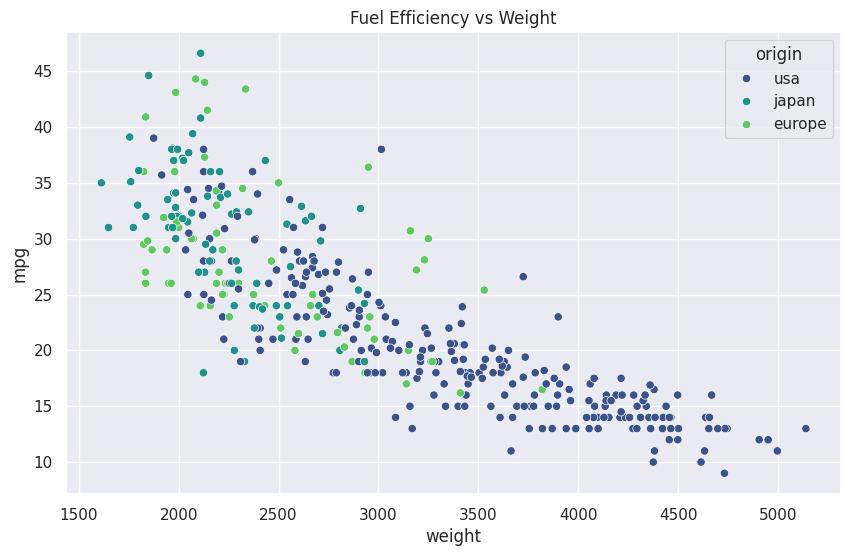

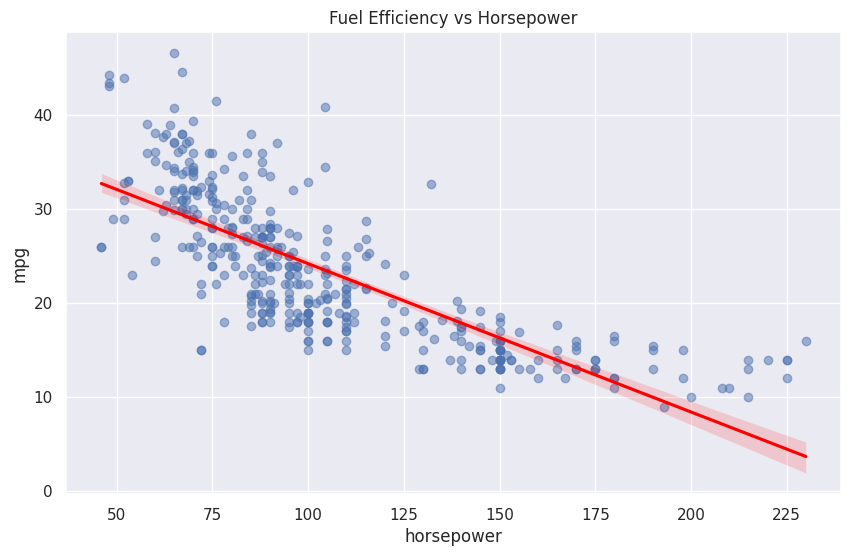

In [21]:
# Scatter plot: Fuel efficiency (mpg) vs Weight
plt.figure(figsize=(10, 6))
sns.scatterplot(x='weight', y='mpg', hue='origin', data=mpg, palette='viridis')
plt.title('Fuel Efficiency vs Weight')
plt.show()

# Regression plot: mpg vs Horsepower
plt.figure(figsize=(10, 6))
sns.regplot(x='horsepower', y='mpg', data=mpg, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Fuel Efficiency vs Horsepower')
plt.show()

**Insight**
- **Weight vs mpg**: Heavier cars tend to have lower fuel efficiency, as shown by the downward trend in the scatter plot.
- **Horsepower vs mpg**: Cars with higher horsepower generally have lower fuel efficiency, as shown in the regression plot.

### Analyzing Engine Characteristics
We can use pair plots to examine relationships between several key variables that define engine characteristics. This helps you visualize patterns between `mpg`, `horsepower`, `displacement`, `weight`, and `cylinders`.


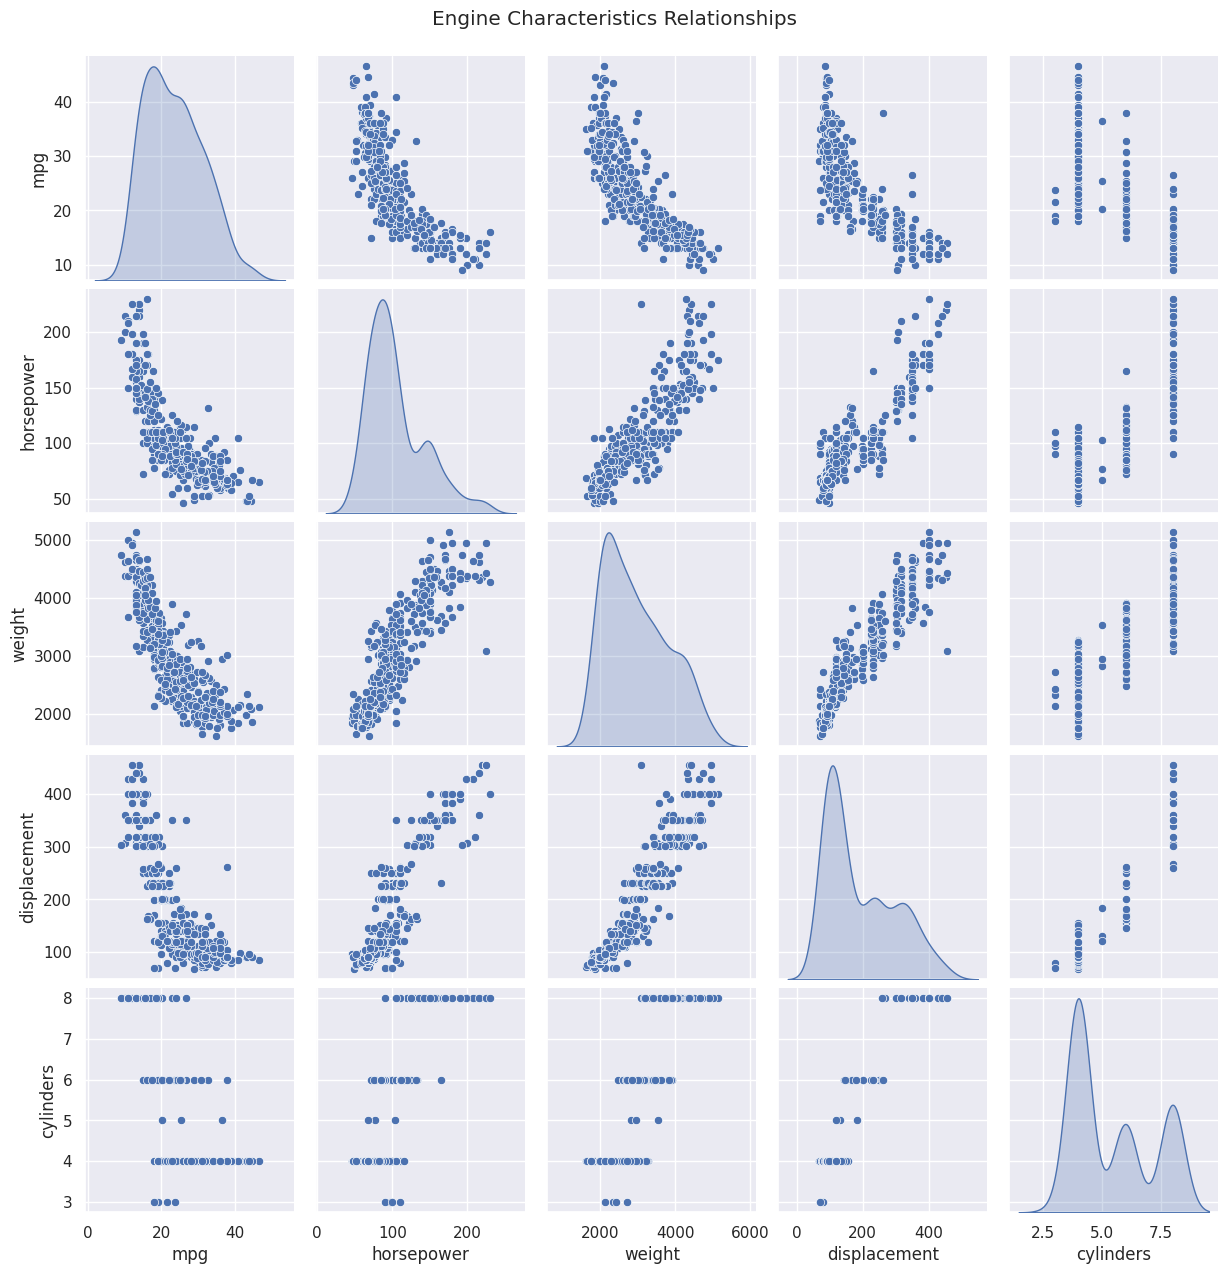

In [22]:
# Pair plot for engine characteristics
sns.pairplot(mpg[['mpg', 'horsepower', 'weight', 'displacement', 'cylinders']], diag_kind='kde')
plt.suptitle('Engine Characteristics Relationships', y=1.02)
plt.show()


**Insight**
- Higher cylinders and horsepower are associated with lower mpg (poorer fuel efficiency).
- **Weight and displacement** tend to increase together, and both negatively impact fuel efficiency.

### Regional Trends
Examine regional differences by plotting fuel efficiency (`mpg`) based on the `origin` of the car. This shows how different regions (USA, Japan, Europe) compare in terms of fuel efficiency and engine characteristics.

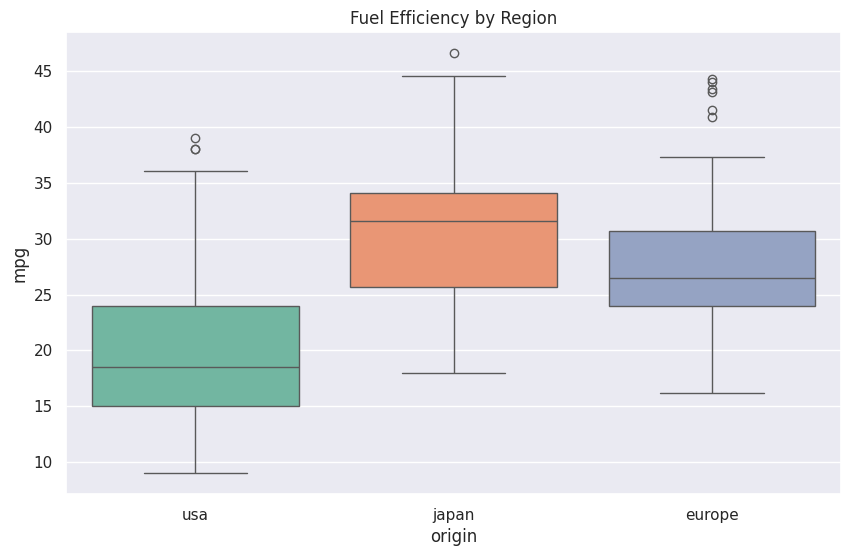

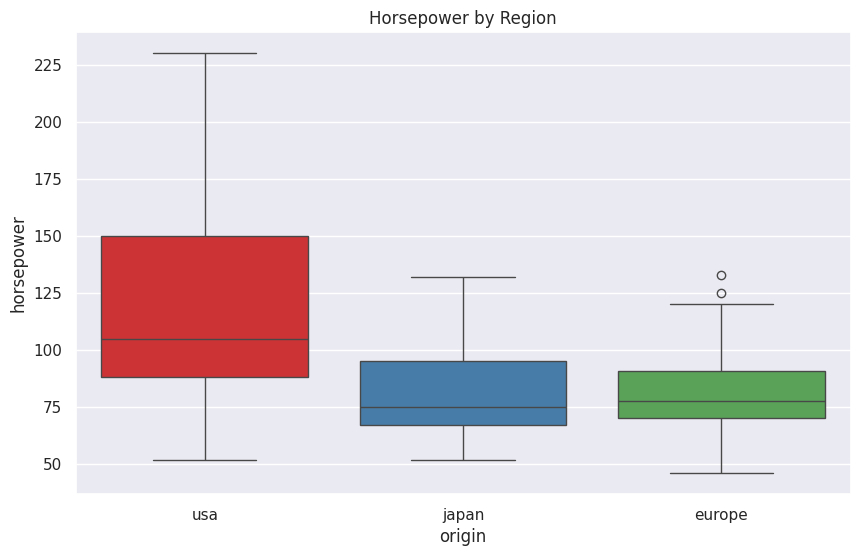

In [23]:
# Boxplot: Fuel efficiency by Region (origin)
plt.figure(figsize=(10, 6))
sns.boxplot(x='origin', y='mpg', data=mpg, palette='Set2')
plt.title('Fuel Efficiency by Region')
plt.show()

# Boxplot: Horsepower by Region (origin)
plt.figure(figsize=(10, 6))
sns.boxplot(x='origin', y='horsepower', data=mpg, palette='Set1')
plt.title('Horsepower by Region')
plt.show()


**Insight**
- **Japanese cars** tend to have higher fuel efficiency (`mpg`) compared to American cars.
- **American cars** are generally heavier with larger engines and lower fuel efficiency, while **European** cars fall somewhere in between.
- Japanese cars typically have lower horsepower but higher mpg.
